# Introduction
This project is associated with the `MAD About Sports` Webinar project in which we are going to check MS Dhoni's performance in IPL. 

Also, we are going to look at several player's performance particularly batsman against a particular team in his IPL carrer. The data for the same is taken from Kaggle. The link for the same is ['here'](https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020).

In [218]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Display setting to display all columns
pd.set_option('display.max_columns', 30)

In [219]:
# Read in the datasets
df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
mdf = pd.read_csv('IPL Matches 2008-2020.csv')

In [220]:
# Print out first 5 rows
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [221]:
# Printing last 5 rows
df.tail()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193467,1237181,1,13,3,SS Iyer,RR Pant,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [222]:
# Shape of the dataframe
df.shape

(193468, 18)

Our dataframe has `193468` rows and `18` columns.

In [223]:
# Missing data and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
id                  193468 non-null int64
inning              193468 non-null int64
over                193468 non-null int64
ball                193468 non-null int64
batsman             193468 non-null object
non_striker         193468 non-null object
bowler              193468 non-null object
batsman_runs        193468 non-null int64
extra_runs          193468 non-null int64
total_runs          193468 non-null int64
non_boundary        193468 non-null int64
is_wicket           193468 non-null int64
dismissal_kind      9495 non-null object
player_dismissed    9495 non-null object
fielder             6784 non-null object
extras_type         10233 non-null object
batting_team        193468 non-null object
bowling_team        193277 non-null object
dtypes: int64(9), object(9)
memory usage: 26.6+ MB


Our dataframe has missing values in different columns, but there is a reason. Let us take a look at them:
1. `dismissal_kind` : this is supposed to having missing values because not on every ball can there be a wicket.
2. `player_dismissed` : this is in relation to dismissal kind as we are getting info on who got out.
3. `fielder` : not every batsman gets caught when he gets out, there can be other reasons as well. fielder columns gives info about which fielder took the catch.
4. `extras_type` : not every ball concedes extra runs, so missing values are expected here as well.
5. `bowling_team` : this can be an issue because we are going to check about a particular batsman scoring runs against which team so we can remove those rows with missing values in the bowling_team column.


In [224]:
# Removing rows having missing values in 'bowling_team'
df.dropna(subset=['bowling_team'], axis=0, inplace=True)

Now, we will check MS Dhoni's performance in the IPL. First we need to check in what format is his name present in the database or there are any different formats present.

In [225]:
# Checking unique names
for player in df['batsman'].unique():
    if player.find('Dhoni') != -1:
        print(player)

MS Dhoni


We can see that there is only one `MS Dhoni` and this is what we expected. Now, let's go ahead and subset the dataframe on player: `MS Dhoni`.

In [226]:
# Selecting 'MS Dhoni' data only
msd = df[df['batsman'] == 'MS Dhoni']

# Resetting index to remove unordered index
msd.reset_index(drop=True, inplace=True)

# Printing out 5 rows
msd.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
1,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
2,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,Chennai Super Kings,Kings XI Punjab
3,335989,1,19,2,MS Dhoni,JDP Oram,MA Khote,0,1,1,0,0,NaN,NaN,NaN,legbyes,Chennai Super Kings,Mumbai Indians
4,335989,1,19,5,MS Dhoni,JDP Oram,MA Khote,0,0,0,0,1,caught,MS Dhoni,DJ Bravo,NaN,Chennai Super Kings,Mumbai Indians


In [227]:
# Checking shape of msd
msd.shape

(3493, 18)

We are going to merge match and msd databases because some of the information that we need for our analysis is in match dataframe which contains details about all the matches played.

In [228]:
mdf.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [229]:
# Selecting columns and merging
columns_to_merge = ['id','city','date','venue','winner']
match_msd = pd.merge(left=msd, right=mdf[columns_to_merge], on='id', how='inner')

In [230]:
match_msd.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,venue,winner
0,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
1,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
2,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
3,335989,1,19,2,MS Dhoni,JDP Oram,MA Khote,0,1,1,0,0,NaN,NaN,NaN,legbyes,Chennai Super Kings,Mumbai Indians,Chennai,2008-04-23,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings
4,335989,1,19,5,MS Dhoni,JDP Oram,MA Khote,0,0,0,0,1,caught,MS Dhoni,DJ Bravo,NaN,Chennai Super Kings,Mumbai Indians,Chennai,2008-04-23,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings


In [231]:
# Checking for missing data and data types
match_msd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 22 columns):
id                  3493 non-null int64
inning              3493 non-null int64
over                3493 non-null int64
ball                3493 non-null int64
batsman             3493 non-null object
non_striker         3493 non-null object
bowler              3493 non-null object
batsman_runs        3493 non-null int64
extra_runs          3493 non-null int64
total_runs          3493 non-null int64
non_boundary        3493 non-null int64
is_wicket           3493 non-null int64
dismissal_kind      126 non-null object
player_dismissed    126 non-null object
fielder             97 non-null object
extras_type         194 non-null object
batting_team        3493 non-null object
bowling_team        3493 non-null object
city                3460 non-null object
date                3493 non-null object
venue               3493 non-null object
winner              3493 non-null object
dtype

We can see city column having some missing values. We'll investigate this further.

In [232]:
missing_city = match_msd[match_msd['city'].isnull()]
missing_city.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,venue,winner
1658,729297,1,8,5,MS Dhoni,F du Plessis,R Bhatia,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Rajasthan Royals,NaN,2014-04-23,Dubai International Cricket Stadium,Chennai Super Kings
1659,729297,1,8,6,MS Dhoni,F du Plessis,R Bhatia,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Rajasthan Royals,NaN,2014-04-23,Dubai International Cricket Stadium,Chennai Super Kings
1660,729297,1,9,1,MS Dhoni,F du Plessis,PV Tambe,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Rajasthan Royals,NaN,2014-04-23,Dubai International Cricket Stadium,Chennai Super Kings
1661,729297,1,9,5,MS Dhoni,F du Plessis,PV Tambe,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Rajasthan Royals,NaN,2014-04-23,Dubai International Cricket Stadium,Chennai Super Kings
1662,729297,1,10,1,MS Dhoni,F du Plessis,R Bhatia,0,0,0,0,1,run out,F du Plessis,R Bhatia,NaN,Chennai Super Kings,Rajasthan Royals,NaN,2014-04-23,Dubai International Cricket Stadium,Chennai Super Kings


We have missing values in city column where the match was held in a different country. We can use the venue column to take information about the city and fill city column.

In [233]:
# Checking unique values in venue column
missing_city['venue'].value_counts()

Dubai International Cricket Stadium    19
Sharjah Cricket Stadium                14
Name: venue, dtype: int64

In [234]:
# Filling missing values in city columns
match_msd.loc[missing_city.index, 'city'] = missing_city['venue'].str.split().str[0]

In [235]:
# Checking the city column
match_msd['city'].unique()

array(['Chandigarh', 'Chennai', 'Bangalore', 'Jaipur', 'Delhi', 'Mumbai',
       'Hyderabad', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'Johannesburg', 'East London', 'Kolkata', 'Ahmedabad', 'Nagpur',
       'Dharamsala', 'Kochi', 'Visakhapatnam', 'Pune', 'Abu Dhabi',
       'Dubai', 'Sharjah', 'Ranchi', 'Cuttack', 'Raipur', 'Rajkot',
       'Indore', 'Bengaluru'], dtype=object)

In [236]:
# Changing 'Bangalore' to 'Bengaluru'
match_msd['city'] = match_msd['city'].replace('Bangalore', 'Bengaluru')

Now that we have filled in the missing values, we can focus on other issue related to the datatypes of our `match_msd` columns. date column has to be in datetime format so that we can work with it.

In [237]:
# Changing date datatype to datetime
match_msd['date'] = pd.to_datetime(match_msd['date'])

print(match_msd['date'].dtype)

datetime64[ns]


In [238]:
# Taking out Year from date column and making a new column
match_msd['year'] = match_msd['date'].apply(lambda x: dt.datetime.strftime(x, '%Y'))

In [239]:
# Checking year column
match_msd['year'].value_counts(dropna=False)

2018    321
2008    319
2019    317
2015    309
2013    298
2012    283
2009    270
2017    261
2014    258
2011    247
2016    220
2010    215
2020    175
Name: year, dtype: int64

In [240]:
# Sorting the match_msd on date and resetting index
match_msd.sort_values('date', inplace=True)
match_msd.reset_index(drop=True, inplace=True)

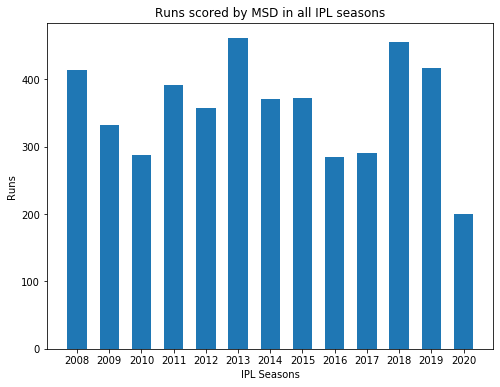

In [241]:
# plotting a line plot for showing his runs in every season
plt.figure(figsize=(8,6))

data = match_msd.groupby('year').agg({'batsman_runs':'sum'})

plt.bar(x=data.index, height=data['batsman_runs'], width=0.6)
plt.title('Runs scored by MSD in all IPL seasons')
plt.xlabel('IPL Seasons')
plt.ylabel('Runs')
plt.show()

MS Dhoni has scored most runs in the 2013 season and 2018 season and has scored least in the 2020 season. Let's go ahead with calculating his batting average in each venue.

In [242]:
# Calculating average of MS Dhoni per venue
match_msd.groupby(['city']).agg({
    'batsman_runs' : 'sum',
    'is_wicket' : 'sum'
})

,batsman_runs,is_wicket
city,,
Abu Dhabi,97,4
Ahmedabad,52,1
Bengaluru,463,7
Cape Town,36,1
Centurion,118,0
Chandigarh,160,3
Chennai,1363,37
Cuttack,23,1
Delhi,181,6


We are missing per city matches played data, so we are going to use the match dataframe to calculate how many MS Dhoni played in each venue. Also, we will take into account only those venues where MS Dhoni has played at least 5 matches as batting average would not convey much information when less matches are played.

In [243]:
# Changing Bengaluru city name in match dataframe
mdf['city'] = mdf['city'].replace('Bangalore', 'Bengaluru')

In [244]:
# Creating a new dataframe to select number of cities per match
matches_played = mdf[mdf['id'].isin(match_msd['id'].unique())].copy()

# Checking the update
matches_played['city'].value_counts(dropna=False)

Chennai           48
Pune              18
Mumbai            17
Kolkata           11
Bengaluru         10
Delhi              8
Hyderabad          8
Jaipur             6
Dubai              6
Chandigarh         6
Ranchi             5
Abu Dhabi          5
Visakhapatnam      4
Durban             4
Sharjah            3
NaN                3
Centurion          3
Rajkot             2
Dharamsala         2
Ahmedabad          2
Johannesburg       2
Port Elizabeth     2
Raipur             1
East London        1
Kochi              1
Cape Town          1
Indore             1
Cuttack            1
Nagpur             1
Name: city, dtype: int64

In [245]:
# Investigating city column having null values
matches_played[matches_played['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
414,729311,NaN,2014-04-27,DR Smith,Sharjah Cricket Stadium,1,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,wickets,5.0,N,NaN,AK Chaudhary,VA Kulkarni


In [246]:
# Using venue to fill missing values in city column
matches_played.loc[matches_played['city'].isnull(), 'city'] = matches_played.loc[matches_played['city'].isnull(), 'venue'].str.split().str[0]

In [247]:
# Creating a grouped dataframe to calculate averages

city_gp = match_msd.groupby('city').agg(
    {
        'batsman_runs' : 'sum',
        'is_wicket' : 'sum'
    }
)

city_gp['matches_per_city'] = matches_played['city'].value_counts(dropna=False)

# Resetting the index
city_gp.reset_index(inplace=True)

# Selecting venues with at least 5 matches
city_gp = city_gp.loc[city_gp['matches_per_city'] >= 5, :]

# Printing final result
city_gp

,city,batsman_runs,is_wicket,matches_per_city
0,Abu Dhabi,97,4,5
2,Bengaluru,463,7,10
5,Chandigarh,160,3,6
6,Chennai,1363,37,48
8,Delhi,181,6,8
10,Dubai,132,6,8
13,Hyderabad,134,7,8
15,Jaipur,145,4,6
18,Kolkata,278,6,11
19,Mumbai,331,13,17


In [248]:
# Calcuating batting average of MS Dhoni
city_gp['batting_avg'] = city_gp['batsman_runs'] / city_gp['is_wicket']

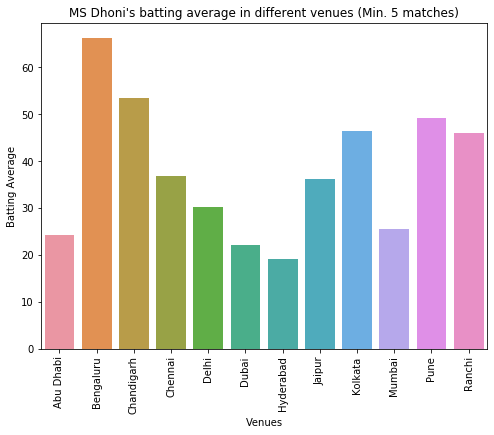

In [249]:
# Plotting a bar graph to display batting_avg
plt.figure(figsize=(8,6))
sns.barplot(x='city', y='batting_avg', data=city_gp)
plt.title('MS Dhoni\'s batting average in different venues (Min. 5 matches)')
plt.xlabel('Venues')
plt.ylabel('Batting Average')
plt.xticks(rotation=90)
plt.show()

MS Dhoni has highest batting average in `Bengaluru` and then in `Chandigarh` and he has the lowest in Hyderabad. Now, we will look at MS Dhoni's batting average against each opposition. Before that we will take a look at oppositions and rectify errors, if any.

In [250]:
# Frequency table of bowling_team column
print('match_msd:', '\n', match_msd['bowling_team'].value_counts(), '\n')

# Checking in match dataframe as well
print('match:')
print(mdf['team1'].value_counts())
print(mdf['team2'].value_counts())

match_msd: 
 Royal Challengers Bangalore    601
Mumbai Indians                 549
Kings XI Punjab                398
Rajasthan Royals               377
Kolkata Knight Riders          373
Delhi Daredevils               351
Sunrisers Hyderabad            320
Deccan Chargers                258
Pune Warriors                   90
Delhi Capitals                  84
Gujarat Lions                   73
Kochi Tuskers Kerala            19
Name: bowling_team, dtype: int64 

match:
Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Rising Pune Supergiant           7
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7


We can see that there are multiple names for the same team, this is maybe because some teams have changed their names. We are going to replace those names with their latest names i.e.:
 1. Delhi Daredevils : Delhi Capitals
 2. Deccan Chargers : Sunrisers Hyderabad
 
Also in match dataframe we can Rising Pune Supergiants also has two names, we will replace that in match_msd as well as in the mdf dataframe to avoid any issues in the future.

In [251]:
# Replacing team names to latest names
match_msd['bowling_team'] = match_msd['bowling_team'].replace('Delhi Daredevils', 'Delhi Capitals')
match_msd['bowling_team'] = match_msd['bowling_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_msd['batting_team'] = match_msd['batting_team'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

# Doing same as above in match dataframe
mdf = mdf.replace('Delhi Daredevils', 'Delhi Capitals')
mdf = mdf.replace('Deccan Chargers', 'Sunrisers Hyderabad')
mdf = mdf.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [252]:
# Checking updated opposition names
match_msd['bowling_team'].value_counts()

Royal Challengers Bangalore    601
Sunrisers Hyderabad            578
Mumbai Indians                 549
Delhi Capitals                 435
Kings XI Punjab                398
Rajasthan Royals               377
Kolkata Knight Riders          373
Pune Warriors                   90
Gujarat Lions                   73
Kochi Tuskers Kerala            19
Name: bowling_team, dtype: int64

In [253]:
# We need to updated matches_played dataframe
matches_played = mdf[mdf['id'].isin(match_msd['id'].unique())].copy()

We will need to see if MS Dhoni has played significant number of matches against each opposition so that we have more information on his batting average.

In [254]:
# Creating a dictionary of matches played by MS Dhoni against each opposition
oppositions = matches_played['team1'].to_list()
oppositions.extend(matches_played['team2'].to_list())

opposition_matches = {}
for i in oppositions:
    if i != 'Chennai Super Kings':
        opposition_matches[i] = opposition_matches.get(i, 0) + 1

In [255]:
# Checking the dictionary
opposition_matches

{'Kings XI Punjab': 21,
 'Royal Challengers Bangalore': 27,
 'Rajasthan Royals': 21,
 'Delhi Capitals': 24,
 'Mumbai Indians': 31,
 'Sunrisers Hyderabad': 25,
 'Kolkata Knight Riders': 22,
 'Kochi Tuskers Kerala': 2,
 'Pune Warriors': 5,
 'Gujarat Lions': 4,
 'Rising Pune Supergiants': 27}

We won't take into consideration `Kochi Tuskers Kerala` as 2 is a very less number of matches to comment anything about a batsman average.

In [256]:
# Calculating batting average of MS Dhoni against each opposition
team_gp = (match_msd[match_msd['bowling_team'] != 'Kochi Tuskers Kerala'].
           groupby('bowling_team').agg({'batsman_runs':'sum', 'is_wicket':'sum'})).reset_index()

# Adding new column batting_avg
team_gp['batting_avg'] = team_gp['batsman_runs'] / team_gp['is_wicket']

# Check the dataframe
team_gp

,bowling_team,batsman_runs,is_wicket,batting_avg
0,Delhi Capitals,590,20,29.500000
1,Gujarat Lions,83,2,41.500000
2,Kings XI Punjab,595,11,54.090909
3,Kolkata Knight Riders,483,12,40.250000
4,Mumbai Indians,679,21,32.333333
5,Pune Warriors,135,3,45.000000
6,Rajasthan Royals,477,13,36.692308
7,Royal Challengers Bangalore,823,23,35.782609
8,Sunrisers Hyderabad,744,20,37.200000


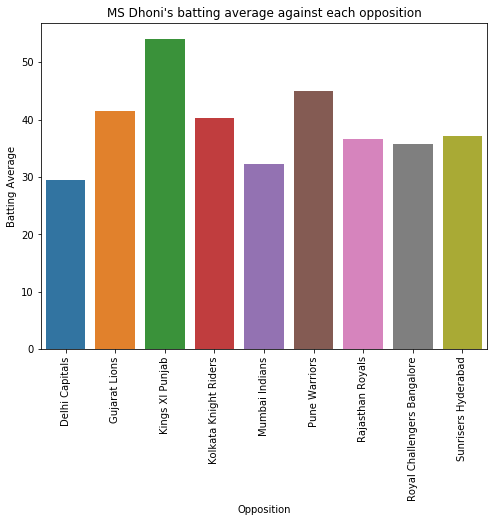

In [257]:
# Plot batting average of MS Dhoni against each opposition
plt.figure(figsize=(8,6))
sns.barplot(x='bowling_team', y='batting_avg', data=team_gp)
plt.title('MS Dhoni\'s batting average against each opposition')
plt.xlabel('Opposition')
plt.ylabel('Batting Average')
plt.xticks(rotation=90)
plt.show()

MS Dhoni has highest batting average against `Kings XI Punjab` and we saw that in venues plot as well that he has second highest average in `Chandigarh`. He has the lowest batting average against `Delhi Capitals` which shows Delhi's plans has worked best against him but still a batting average of approximately 30 runs is not bad in a 20 over game.

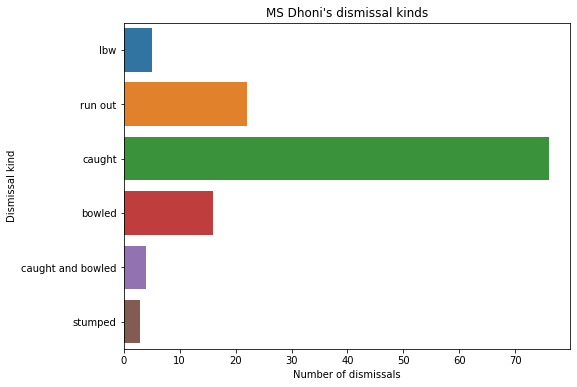

In [258]:
# Plotting dismissal kind of MS Dhoni
plt.figure(figsize=(8,6))
sns.countplot(y='dismissal_kind', data=match_msd)
plt.title('MS Dhoni\'s dismissal kinds')
plt.xlabel('Number of dismissals')
plt.ylabel('Dismissal kind')
plt.show()

He got caught out more times than any other way which is expected, but what is surprising is that the second most way of him getting out is by runout which was not expected.

In [259]:
match_msd.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,city,date,venue,winner,year
0,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,2008
1,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,2008
2,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,Chennai Super Kings,Kings XI Punjab,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,2008
3,335989,1,17,6,MS Dhoni,ML Hayden,DS Kulkarni,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians,Chennai,2008-04-23,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,2008
4,335989,1,17,2,MS Dhoni,ML Hayden,DS Kulkarni,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Mumbai Indians,Chennai,2008-04-23,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,2008


Now we will calculate how many runs did MS Dhoni scored in his IPL career with respect to:
 1. First 10 balls
 2. 10 balls to 30 balls
 3. After 30 balls

In [260]:
msd_runs_wo_wides = match_msd[match_msd['extras_type'] != 'wides']
runs = match_msd.groupby('id')['batsman_runs'].sum().values
balls = msd_runs_wo_wides.groupby('id')['ball'].count().values

msd_matches_id = matches_played['id'].unique()

runs_10b = []
runs_10b_30b = []
runs_30b_plus = []

for m, b in zip(msd_matches_id, balls):
    
    if b <= 10:
        runs_10b.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'].sum())
        runs_10b_30b.append(0)
        runs_30b_plus.append(0)
        
    elif b <= 30:
        runs_10b.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'][:10].sum())
        runs_10b_30b.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'][10:30].sum())
        runs_30b_plus.append(0)
        
    else:
        runs_10b.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'][:10].sum())
        runs_10b_30b.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'][10:30].sum())
        runs_30b_plus.append(msd_runs_wo_wides[msd_runs_wo_wides['id'] == m]['batsman_runs'][30:].sum())

We will add these lists to matches_played dataframe which contains information about all matches in which MS Dhoni has played. This will help us to visualize runs on the basis of different IPL seasons.

In [261]:
matches_played['runs'] = runs
matches_played['balls'] = balls
matches_played['runs_10b'] = runs_10b
matches_played['runs_10b_30b'] = runs_10b_30b
matches_played['runs_30b_plus'] = runs_30b_plus

In [262]:
matches_played.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,runs,balls,runs_10b,runs_10b_30b,runs_30b_plus
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2,3,2,0,0
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,30,16,20,10,0
11,335993,Chennai,2008-04-26,JDP Oram,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,9.0,N,NaN,BF Bowden,AV Jayaprakash,43,27,16,27,0
14,335996,Bengaluru,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,65,30,21,44,0
19,336001,Chennai,2008-05-02,V Sehwag,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,wickets,8.0,N,NaN,BF Bowden,K Hariharan,32,27,8,24,0


In [263]:
msd_runs = matches_played[['date','runs','balls','runs_10b','runs_10b_30b','runs_30b_plus']].copy()
msd_runs['date'] = pd.to_datetime(msd_runs['date'])
msd_runs['year'] = msd_runs['date'].dt.year

In [264]:
msd_runs.head()

,date,runs,balls,runs_10b,runs_10b_30b,runs_30b_plus,year
1,2008-04-19,2,3,2,0,0,2008
7,2008-04-23,30,16,20,10,0,2008
11,2008-04-26,43,27,16,27,0,2008
14,2008-04-28,65,30,21,44,0,2008
19,2008-05-02,32,27,8,24,0,2008


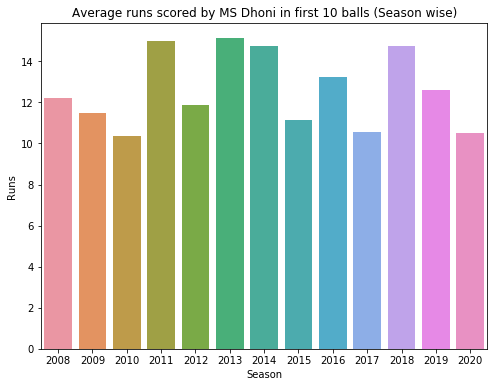

In [265]:
# Plotting runs scored on first 10 balls
plt.figure(figsize=(8,6))
sns.barplot(x='year', y='runs_10b', data=msd_runs, estimator=np.mean, ci=None)
plt.title('Average runs scored by MS Dhoni in first 10 balls (Season wise)')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

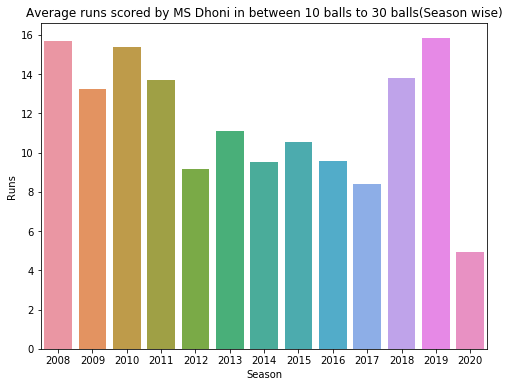

In [266]:
# Plotting runs scored b/w 10 balls and 30 balls
plt.figure(figsize=(8,6))
sns.barplot(x='year', y='runs_10b_30b', data=msd_runs, estimator=np.mean, ci=None)
plt.title('Average runs scored by MS Dhoni in between 10 balls to 30 balls(Season wise)')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

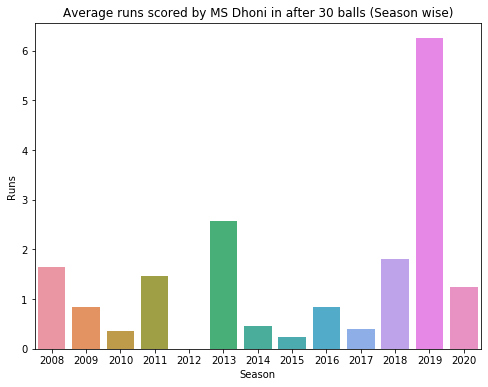

In [267]:
# Plotting runs scored after 30 balls
plt.figure(figsize=(8,6))
sns.barplot(x='year', y='runs_30b_plus', data=msd_runs, estimator=np.mean, ci=None)
plt.title('Average runs scored by MS Dhoni in after 30 balls (Season wise)')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

Looking at these visualizations, we can deduct that MS Dhoni on an average:
 1. On first 10 balls : has scored most in 2013 and least in 2020.
 2. Between 10 to 30 balls : has scored most in 2008, 2019 and least in 2020.
 3. After 30 balls: has scored most in 2019 and least in 2012 where he didn't play a single innings of more than 30 balls.

## Monte Carlo Simulation

Monte Carlo Simulation is a mathematical technique, which is used to estimate the possible outcomes of an uncertain event. We are going to use this technique to estimate runs scored and balls faced by a batsman against a particular team in his next match against them, given he gets to bat.

We will first start with showing the process with `MS Dhoni` against `Royal Challengers Bangalore`. After that, we will create a function to simulate this process and give the estimate.

In [268]:
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [269]:
# Slicing df on 'MS Dhoni' and 'RCB'
monte_sim = df[(df['batsman'] =='MS Dhoni') & (df['bowling_team'] == 'Royal Challengers Bangalore')]
monte_sim.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
3326,335996,1,13,2,MS Dhoni,MEK Hussey,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Royal Challengers Bangalore
3327,335996,1,13,3,MS Dhoni,MEK Hussey,JH Kallis,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Royal Challengers Bangalore
3329,335996,1,13,5,MS Dhoni,MEK Hussey,JH Kallis,3,0,3,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Royal Challengers Bangalore
3331,335996,1,14,1,MS Dhoni,MEK Hussey,DW Steyn,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Royal Challengers Bangalore
3332,335996,1,14,2,MS Dhoni,MEK Hussey,DW Steyn,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Royal Challengers Bangalore


In [270]:
# Creating dataframe of value_counts of batsman_runs column
monte_sim_runs = pd.DataFrame(monte_sim['batsman_runs'].value_counts().sort_index())
monte_sim_runs

,batsman_runs
0,211
1,241
2,52
3,2
4,49
6,46


In [271]:
# Getting info on number of dismissals
is_out = (monte_sim['is_wicket'] == 1).sum()
is_out

23

In [272]:
# Renaming column
monte_sim_runs.rename(columns={'batsman_runs':'counts'}, inplace=True)

# Deducting dot balls with is_out because that is dot delivery as well
monte_sim_runs.loc[len(monte_sim_runs) + 1,'counts'] = is_out

# Adding a new row with wicket informations
monte_sim_runs.loc[0,'counts'] -= is_out     # Considering index 7 as wicket
monte_sim_runs

,counts
0,188.0
1,241.0
2,52.0
3,2.0
4,49.0
6,46.0
7,23.0


In [273]:
# Creating two new columns for estimation: probability of runs, cumulative summation of prob
monte_sim_runs['prob_counts'] = (monte_sim_runs['counts'] / monte_sim_runs['counts'].sum()) * 100
monte_sim_runs['cum_sum_prob'] = monte_sim_runs['prob_counts'].cumsum()
monte_sim_runs

,counts,prob_counts,cum_sum_prob
0,188.0,31.281198,31.281198
1,241.0,40.099834,71.381032
2,52.0,8.652246,80.033278
3,2.0,0.332779,80.366057
4,49.0,8.153078,88.519135
6,46.0,7.653910,96.173045
7,23.0,3.826955,100.000000


In [277]:
# Estimating batsman's next innings score
runs_scored = 0
balls_faced = 0
balls_estimate = 73  # https://stats.espncricinfo.com/ci/content/records/305207.html - took info from this link

for ball in range(balls_estimate):
    balls_faced += 1
    rnd = np.random.random() * 100
    if rnd <= monte_sim_runs.loc[0,'cum_sum_prob']:
        pass
    elif rnd <= monte_sim_runs.loc[1, 'cum_sum_prob']:
        runs_scored += 1
    elif rnd <= monte_sim_runs.loc[2, 'cum_sum_prob']:
        runs_scored += 2
    elif rnd <= monte_sim_runs.loc[3, 'cum_sum_prob']:
        runs_scored += 3
    elif rnd <= monte_sim_runs.loc[4, 'cum_sum_prob']:
        runs_scored += 4
    elif rnd <= monte_sim_runs.loc[6, 'cum_sum_prob']:
        runs_scored += 6
    else:
        break
       
print('MS Dhoni\'s estimated next score against RCB is:')
print('Runs scored by batsman: ', runs_scored)
print('Balls faced by batsman: ', balls_faced)

MS Dhoni's estimated next score against RCB is:
Runs scored by batsman:  41
Balls faced by batsman:  28


In [275]:
# Defining a function to calculate runs scored by a player against a team
def next_score(player_name, opposition_team):
    
    '''This function will help us find the next score of a batsman against a team specified as arguments with the help of 
    a basic model of monte carlo simulation.
    '''
    deliveries = df[(df['batsman'] == player_name) & (df['bowling_team'] == opposition_team)]
    runs_freq = deliveries['batsman_runs'].value_counts().sort_index()
    outs = deliveries['is_wicket'].sum()
    runs_freq[7] = outs                 # assigning int 7 to wicket for easy process
    runs_freq[0] -= outs
    
    player_runs = pd.DataFrame(runs_freq)
    player_runs.reset_index(inplace=True)
    player_runs.rename(columns={'index':'output'}, inplace=True)
    
    outputs = player_runs['output'].to_list()
    
    
    for output in [0,1,2,3,4,6,7]:
        if output not in outputs:
            player_runs.loc[len(player_runs.index)] = [output,0]
            
    player_runs.sort_values('output', inplace=True)
    player_runs.reset_index(drop=True, inplace=True)
    
    player_runs['runs(%)'] = (player_runs['batsman_runs'] / player_runs['batsman_runs'].sum()) * 100
    player_runs['cum_sum_runs(%)'] = player_runs['runs(%)'].cumsum()
    
    balls_estimate = 73
    runs_scored = 0
    balls_faced = 0
    
    for ball in range(balls_estimate):
        r_num = np.random.random() * 100
        balls_faced += 1
        
        if r_num <= player_runs.loc[0, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[0, 'output']
            
        elif r_num <= player_runs.loc[1, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[1, 'output']
            
        elif r_num <= player_runs.loc[2, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[2, 'output']
            
        elif r_num <= player_runs.loc[3, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[3, 'output']
            
        elif r_num <= player_runs.loc[4, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[4, 'output']
            
        elif r_num <= player_runs.loc[5, 'cum_sum_runs(%)']:
            runs_scored += player_runs.loc[5, 'output']
        
        else:
            break
            
    return runs_scored, balls_faced

In [276]:
# We have made the function and we are going to test it with 5 players

# 'V Kohli' against 'Chennai Super Kings'
a,b = next_score('V Kohli', 'Chennai Super Kings')
print('Virat Kohli\'s estimated next score against CSK:')
print('Runs: {}, Balls: {}'.format(a,b))
print('')

# 'SPD Smith' against 'Sunrisers Hyderabad'
a,b = next_score('SPD Smith', 'Sunrisers Hyderabad')
print('Steve Smith\'s estimated next score against SRH:')
print('Runs: {}, Balls: {}'.format(a,b))
print('')

# 'AB de Villiers' against 'Kings XI Punjab'
a,b = next_score('AB de Villiers', 'Kings XI Punjab')
print('AB de Villiers\'s estimated next score against KXIP:')
print('Runs: {}, Balls: {}'.format(a,b))
print('')

# 'KS Williamson' against 'Delhi Capitals'
a,b = next_score('KS Williamson', 'Delhi Capitals')
print('Kane Williamson\'s estimated next score against DC:')
print('Runs: {}, Balls: {}'.format(a,b))
print('')

# 'KA Pollard' against 'Kolkata Knight Riders'
a,b = next_score('KA Pollard', 'Kolkata Knight Riders')
print('Kieron Pollard\'s estimated next score against KKR:')
print('Runs: {}, Balls: {}'.format(a,b))

Virat Kohli's estimated next score against CSK:
Runs: 31, Balls: 27

Steve Smith's estimated next score against SRH:
Runs: 7, Balls: 9

AB de Villiers's estimated next score against KXIP:
Runs: 0, Balls: 2

Kane Williamson's estimated next score against DC:
Runs: 6, Balls: 5

Kieron Pollard's estimated next score against KKR:
Runs: 0, Balls: 1
